In [1]:
from Models.A2C import A2C
import gym

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

NUM_EPOCHS = 2500

Using TensorFlow backend.


In [2]:
env = gym.make('CartPole-v0')
model = A2C(env.observation_space.shape[0],2,[8,16],lr_actor=0.001,lr_critic=0.001,gamma=0.99)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
actor_losses = []
critic_losses = []
total_rewards = []
for i_episode in range(NUM_EPOCHS):
    if i_episode%100==1:
        print(str(i_episode)+' Total Reward = '+ str(total_rewards[-1]))
    states,actions,rewards,next_states,dones = [],[],[],[],[]
    observation = env.reset()
    done = False
    k = 0
    total_reward = 0
    while done==False:

        k=k+1
        action = model.predict_action(np.array([observation]))
        states.append(observation)
        observation, reward, done, info = env.step(action)
        reward+=k*0.001
        if (done==True):
            reward = -10
        next_states.append(observation)
        actions.append(action)
        rewards.append(reward)
        dones.append(done)
        total_reward+=reward        
    actor_loss, critic_loss = model.train(states,actions,rewards,next_states,dones)
    total_rewards.append(total_reward)
    actor_losses.append(actor_loss)
    critic_losses.append(critic_loss)

1 Total Reward = 2.0779999999999994


101 Total Reward = 10.209999999999997


201 Total Reward = 92.85099999999993


301 Total Reward = 149.02599999999987


401 Total Reward = 200.52799999999985


501 Total Reward = 208.89999999999986


601 Total Reward = 191.01999999999984


701 Total Reward = 208.89999999999986


801 Total Reward = 208.89999999999986


901 Total Reward = 200.52799999999985


1001 Total Reward = 208.89999999999986


1101 Total Reward = 208.89999999999986


1201 Total Reward = 208.89999999999986


1301 Total Reward = 208.89999999999986


1401 Total Reward = 208.89999999999986


1501 Total Reward = 208.89999999999986


1601 Total Reward = 208.89999999999986


1701 Total Reward = 208.89999999999986


1801 Total Reward = 208.89999999999986


1901 Total Reward = 208.89999999999986


2001 Total Reward = 208.89999999999986


2101 Total Reward = 208.89999999999986


2201 Total Reward = 208.89999999999986


2301 Total Reward = 208.89999999999986


2401 Total Reward = 208.89999999999986


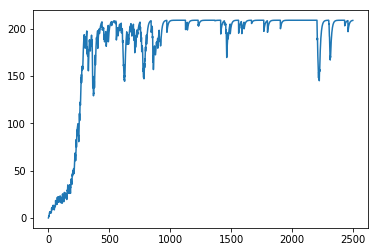

In [6]:
running_rewards = []
running_reward = 0
for i in range(len(total_rewards)):
    running_reward = 0.9*running_reward+0.1*total_rewards[i]
    running_rewards.append(running_reward)
plt.plot(range(0,NUM_EPOCHS),running_rewards)
